<a href="https://colab.research.google.com/github/PAIN-BARHAM/APIs/blob/master/Investigate_a_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

#### No show Appointments Datasets: ####

- This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* patientid: Identification of a patient (Number)
* appointmentid: Identification of each appointment (Number)
* Gender: the geneder of the patient (M or F)
* ScheduledDay: The day of the actuall appointment, when they have to visit the doctor (Date)
* AppointmentDay: The day someone called or registered the appointment, this is before appointment of course (Date)
* Age: How old is the patient (Number)
* Neighbourhood: Where the appointment takes place (String)
* Scholarship: True of False (Boolean)
* Hipertension: True or False (Boolean)
* Diabetes: True or False (Boolean)
* Alcoholism: True or False (Boolean)
* Handcap: True or False (Boolean)
* SMS_received: 1 or more messages sent to the patient. (Number)
* No-show: True or False. (Boolean)

### Question(s) for Analysis

- why many poeple miss their appointments?
- Is there any relation with missing the appointments with any factor?

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

# Adding the magic command to show the plots in the notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [ ]:
# No-show  is the independent variable.
# No-show = Yes means the patient did not show up to their appointment.
# No-show = No means the patient showed up to their appointment.
# other variables are dependent variables.

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
# adding description about the columns
# So we have 14 columns (features) in total and 110527 rows (patients) in total
df.shape

(110527, 14)

In [ ]:
# print a general statistics about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
# check if there is any null value in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
## We don't have any null values in the dataset

In [ ]:
# check if there is any duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
## the patientID columns is not needed for our analysis, so we can drop it
df.drop(['PatientId'], axis=1, inplace=True)

In [ ]:
## check if we have any duplicate in appointmentid column
df['AppointmentID'].duplicated().sum()

0

In [ ]:
# print some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   AppointmentID   110527 non-null  int64 
 1   Gender          110527 non-null  object
 2   ScheduledDay    110527 non-null  object
 3   AppointmentDay  110527 non-null  object
 4   Age             110527 non-null  int64 
 5   Neighbourhood   110527 non-null  object
 6   Scholarship     110527 non-null  int64 
 7   Hipertension    110527 non-null  int64 
 8   Diabetes        110527 non-null  int64 
 9   Alcoholism      110527 non-null  int64 
 10  Handcap         110527 non-null  int64 
 11  SMS_received    110527 non-null  int64 
 12  No-show         110527 non-null  object
dtypes: int64(8), object(5)
memory usage: 11.0+ MB


In [ ]:
# print the first 5 rows of the dataset
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# df.fillna(df.mean , inplace=True)
df.info()
# df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   AppointmentID   110527 non-null  int64 
 1   Gender          110527 non-null  object
 2   ScheduledDay    110527 non-null  object
 3   AppointmentDay  110527 non-null  object
 4   Age             110527 non-null  int64 
 5   Neighbourhood   110527 non-null  object
 6   Scholarship     110527 non-null  int64 
 7   Hipertension    110527 non-null  int64 
 8   Diabetes        110527 non-null  int64 
 9   Alcoholism      110527 non-null  int64 
 10  Handcap         110527 non-null  int64 
 11  SMS_received    110527 non-null  int64 
 12  No-show         110527 non-null  object
dtypes: int64(8), object(5)
memory usage: 11.0+ MB


In [ ]:
# check how many show and no-show appointments we have
df['No-show'].value_counts()
# we see most of the patients show up to their appointments which is good.

No-show
No     88208
Yes    22319
Name: count, dtype: int64

In [ ]:
# check if we have duplicates in patientid column
# df['PatientId'].duplicated().sum()
### We have 48228 duplicate patientid values which means that we have 48228 patients who have booked more than one appointment

In [ ]:
# check the patients gender distribution

df['Gender'].value_counts()

Gender
F    71840
M    38687
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_bar_graphs(df, feature, figsize=(8,6)):
    """ this function takes a dataframe and a feature and plot a bar graph for that feature"""
    df[feature].value_counts().plot(kind='bar', figsize=figsize);

    feature = feature.replace('_', ' ').title()

    plt.title(f'{feature} Distribution', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12);


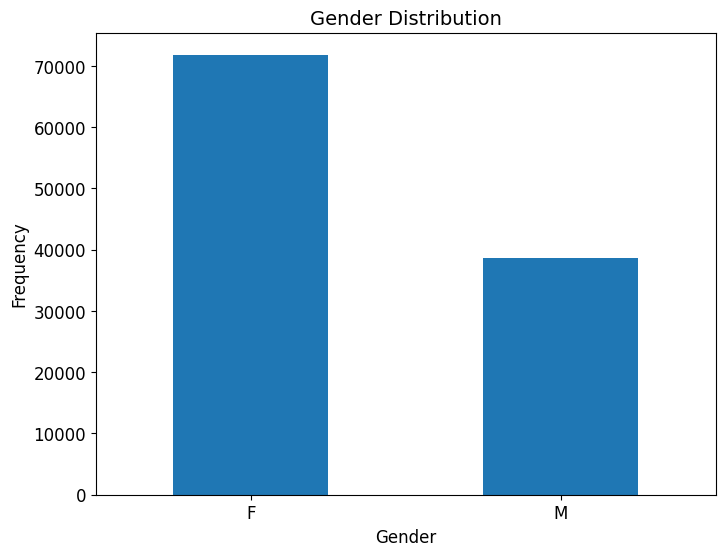

In [ ]:
plot_bar_graphs(df, "Gender")

In [ ]:
# check if the gender has any effect on the no-show appointments
df.groupby('No-show')['Age'].mean()

No-show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64

In [ ]:
# check the age column to see if we have any outliers
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [ ]:
# the average age of the patients is 37 years old which is normal

In [ ]:
# there is a negative value in the age column which is not possible, so we will drop it
df.drop(df[df['Age'] < 0].index, inplace=True)


In [ ]:
# see how many patients are older than 100 years old
df[df['Age'] > 100].count()

# we have 7 patients who are older than 100 years old which is normal

AppointmentID     7
Gender            7
ScheduledDay      7
AppointmentDay    7
Age               7
Neighbourhood     7
Scholarship       7
Hipertension      7
Diabetes          7
Alcoholism        7
Handcap           7
SMS_received      7
No-show           7
dtype: int64

In [ ]:
# so we don't have any relation between the age and the no-show

In [ ]:
# see the relation between the age and the no-show
df.groupby('No-show')['Gender'].value_counts()

No-show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: count, dtype: int64

In [ ]:
# we see that the number of femals are higher than the males in both show and no-show appointments
# but this makes sense since their number is higher

In [ ]:
# check how many patients are having a scholarship
df['Scholarship'].value_counts()
# we have 10861 patients who have a scholarship and 99666 patients who don't have a scholarship


Scholarship
0    99665
1    10861
Name: count, dtype: int64

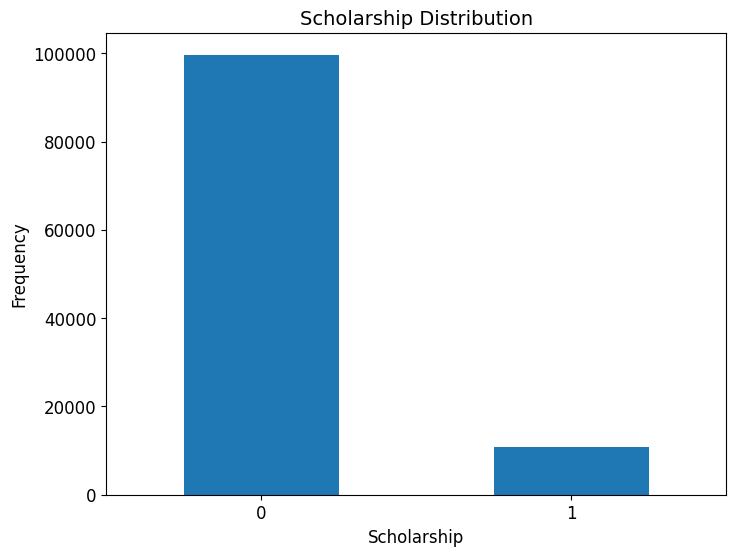

In [ ]:
# plot the number of patients who have a scholarship and who don't have a scholarship
plot_bar_graphs(df, "Scholarship")

In [ ]:
# check the relation between the scholarship and the no-show
df.groupby('No-show')['Scholarship'].value_counts()

No-show  Scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
Name: count, dtype: int64

In [ ]:
# so we don't have any relation between the scholarship and the no-show
# most of the patients who have a scholarship show up to their appointments
# most of the patients who don't have a scholarship show up to their appointments
# so we can say that the scholarship is not a factor that affects the no-show


In [ ]:
# check how many patients are having a hypertension
df['Hipertension'].value_counts()
# we have 21801 patients who have a hypertension and 88726 patients who don't have a hypertension


Hipertension
0    88725
1    21801
Name: count, dtype: int64

In [ ]:
# see the relation between the hypertension and the no-show
df.groupby('No-show')['Hipertension'].value_counts()

No-show  Hipertension
No       0               70178
         1               18029
Yes      0               18547
         1                3772
Name: count, dtype: int64

In [ ]:
# so we don't have any relation between the hypertension and the no-show
# most of the patients who have a hypertension show up to their appointments
# most of the patients who don't have a hypertension show up to their appointments
# so we can say that the hypertension is not a factor that affects the no-show

In [ ]:
# check how many patients are having a diabetes
df['Diabetes'].value_counts()
# we have 7943 patients who have a diabetes and 102584 patients who don't have a diabetes

Diabetes
0    102583
1      7943
Name: count, dtype: int64

In [ ]:
# see the relation between the diabetes and the no-show
df.groupby('No-show')['Diabetes'].value_counts()


No-show  Diabetes
No       0           81694
         1            6513
Yes      0           20889
         1            1430
Name: count, dtype: int64

In [ ]:
# so we don't have any relation between the diabetes and the no-show
# most of the patients who have a diabetes show up to their appointments
# most of the patients who don't have a diabetes show up to their appointments
# so we can say that the diabetes is not a factor that affects the no-show


In [ ]:
# check how many patients are having a alcoholism
df['Alcoholism'].value_counts()
# we have 3360 patients who have a alcoholism and 107167 patients who don't have a alcoholism


Alcoholism
0    107166
1      3360
Name: count, dtype: int64

In [ ]:
# see the relation between the alcoholism and the no-show
df.groupby('No-show')['Alcoholism'].value_counts()

No-show  Alcoholism
No       0             85524
         1              2683
Yes      0             21642
         1               677
Name: count, dtype: int64

In [ ]:
# so we don't have any relation between the alcoholism and the no-show
# most of the patients who have a alcoholism show up to their appointments
# most of the patients who don't have a alcoholism show up to their appointments
# so we can say that the alcoholism is not a factor that affects the no-show


In [ ]:
# check how many patients are having a handicap
df['Handcap'].value_counts()
# we have 2241 patients who have a handicap and 108285 patients who don't have a handicap

Handcap
0    108285
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [ ]:
2042 + 183 + 13 + 3

2241

In [ ]:
# see the relation between the handicap and the no-show
df.groupby('No-show')['Handcap'].value_counts()


No-show  Handcap
No       0          86373
         1           1676
         2            146
         3             10
         4              2
Yes      0          21912
         1            366
         2             37
         3              3
         4              1
Name: count, dtype: int64

In [ ]:
# so we don't have any relation between the handicap and the no-show
# most of the patients who have a handicap show up to their appointments
# most of the patients who don't have a handicap show up to their appointments
# so we can say that the handicap is not a factor that affects the no-show


In [ ]:
# check how many patients are having a sms_received
df['SMS_received'].value_counts()
# we have 35482 patients who have received an sms and 75040 patients who haven't received an sms
# so we can say that most of the patients haven't received an sms


SMS_received
0    75044
1    35482
Name: count, dtype: int64

In [ ]:
# see the relation between the sms_received and the no-show
df.groupby('No-show')['SMS_received'].value_counts()


No-show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: count, dtype: int64

In [ ]:
# We can see that most of the patients who have received an sms show up to their appointments
# also most of the patients who haven't received an sms show up to their appointments
# so we can say that the sms_received is not a big factor that affects the no-show
# but we can say that the patients who haven't received an sms are more likely to show up to their appointments



### Data Cleaning

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section

In [ ]:
## We don't have any duplicate values in appointmentid column so we can drop it
df.drop(['AppointmentID'], axis=1, inplace=True)

In [ ]:
# we will change the no-show column name to show_up to make it easier to understand
df.rename(columns={'No-show': 'no_show_up'}, inplace=True)

In [ ]:
# we will check the data type of the appointment day column
df['ScheduledDay'].dtype

dtype('O')

In [ ]:
# dtype('O') means that the data type is object

In [ ]:
# we will check the data type of the appointment day column
df['ScheduledDay'].dtype

dtype('O')

In [ ]:
# we will change the data type of the appointment day column to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])


In [ ]:
# show the first 5 rows of the appointment day column
df['ScheduledDay'].head()


0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [ ]:
# we will check the data type of the appointment day column
df['AppointmentDay'].dtype

dtype('O')

In [ ]:
# we will change the data type of the scheduled day column to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [ ]:
# show the first 5 rows of the appointment day column
df['ScheduledDay'].head()


0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Check the histogram of the dataset

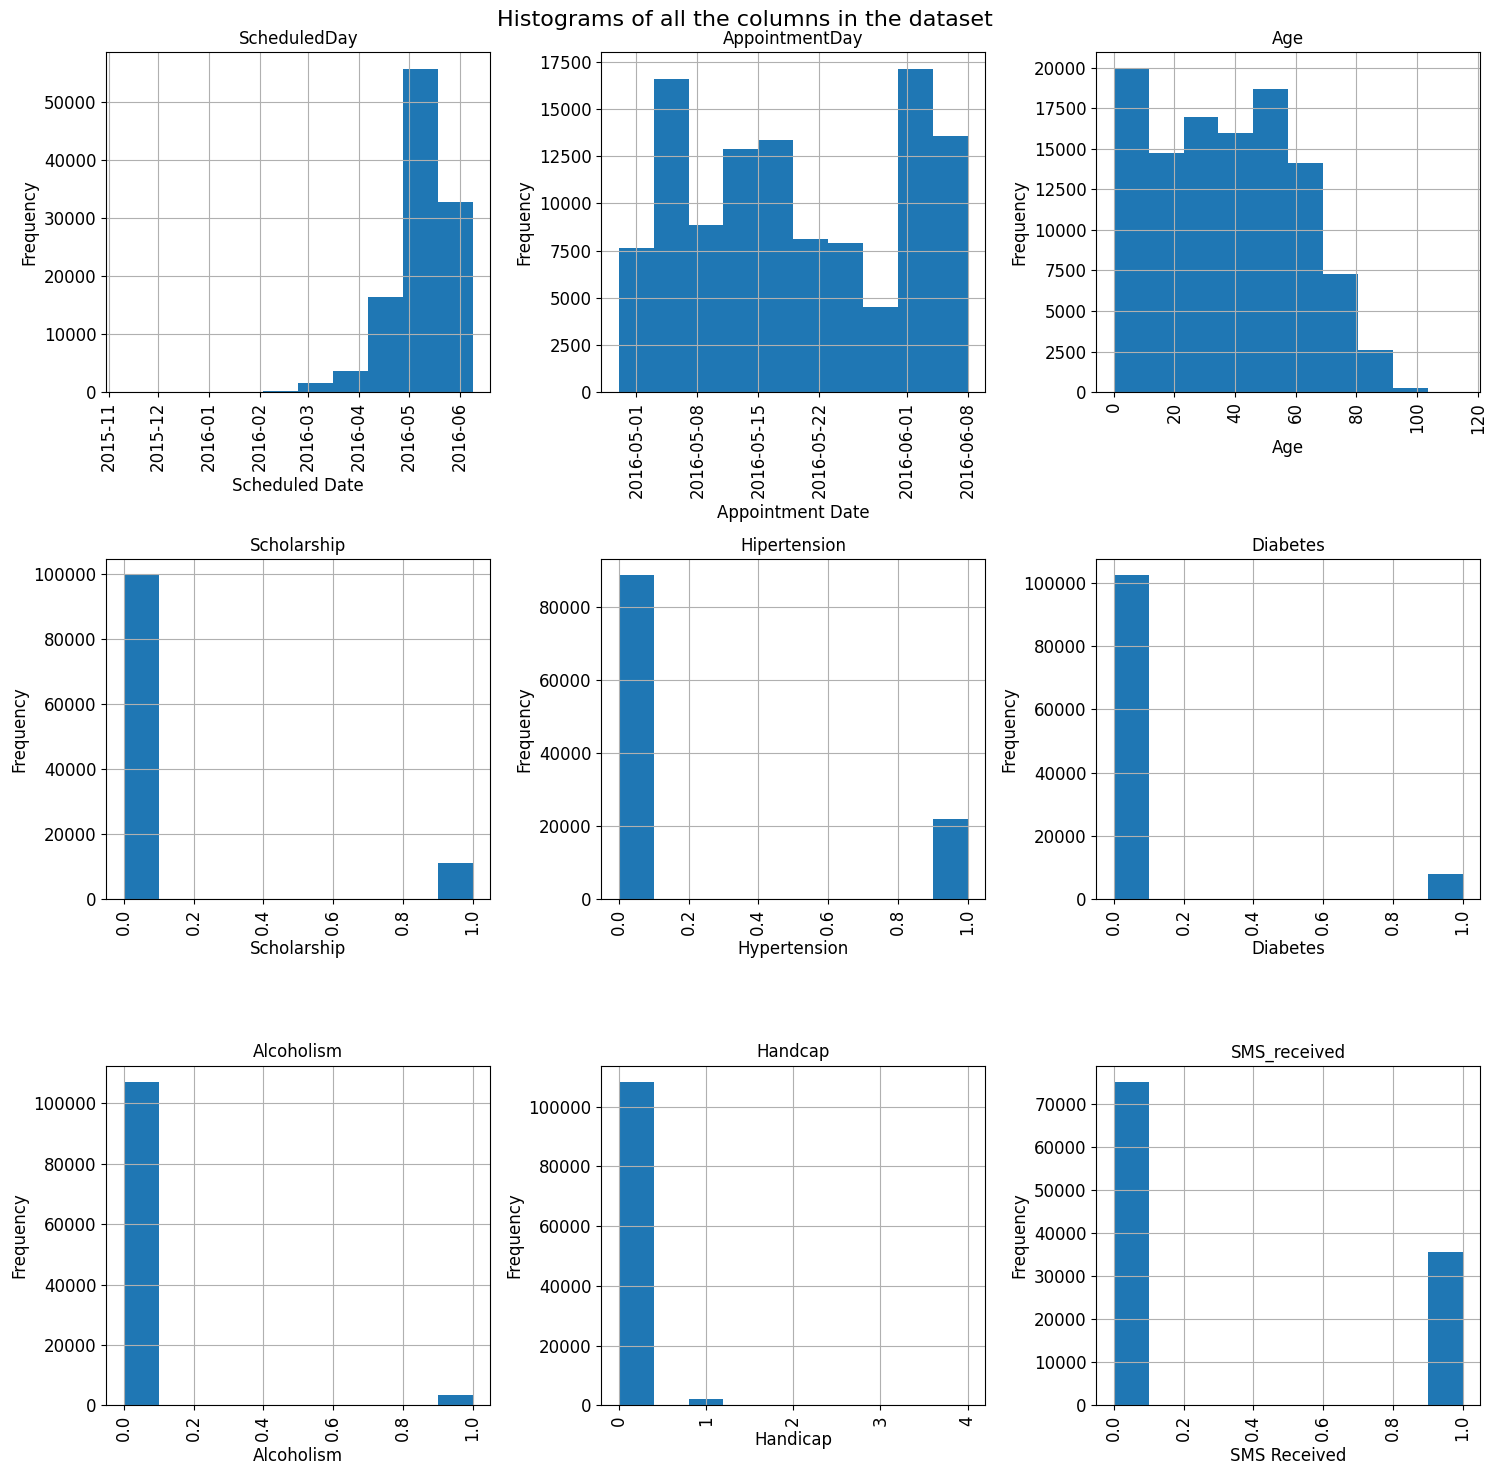

In [ ]:
import matplotlib.pyplot as plt

# plot all the columns in the dataset except the date column
# df.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.hist(figsize=(15, 15))

# add a title to the plot
plt.suptitle("Histograms of all the columns in the dataset", fontsize=16)

# add space between title and the plot
plt.subplots_adjust(top=0.9, bottom=0.5)  # Adjust the bottom parameter to add space

# iterate over each subplot
X_labels = ["Scheduled Date", "Appointment Date", "Age", "Scholarship", "Hypertension", "Diabetes", "Alcoholism", "Handicap", "SMS Received"]

for i, ax in enumerate(plt.gcf().axes):
    ax.tick_params(axis='x', labelrotation=90, labelsize=12)  # rotate x-labels and set font size
    ax.tick_params(axis='y', labelsize=12)  # set y-label font size
    ax.set_xlabel(X_labels[i], fontsize=12)  # set x-label
    ax.set_ylabel("Frequency", fontsize=12)  # set y-label
    # add space between the plot and the x label


# add space between the plots
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
# sort the age column to see the distribution of the age
df['Age'].sort_values()

104654      0
44729       0
29671       0
42673       0
42674       0
         ... 
97666     115
68127     115
63912     115
76284     115
63915     115
Name: Age, Length: 110526, dtype: int64

In [ ]:
# print the unique values in the age column
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

Text(0, 0.5, 'Frequency')

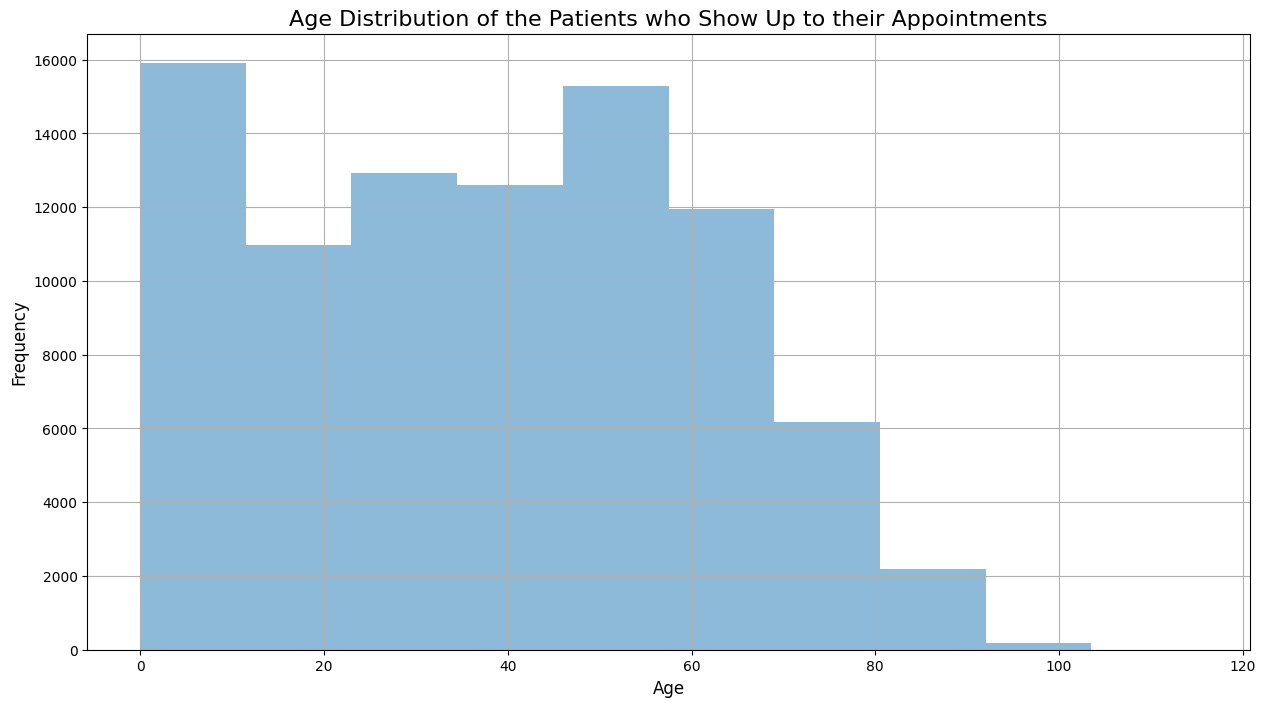

In [ ]:
# plot the age distribution of the patients who show up to their appointments
df[df['no_show_up'] == 'No']['Age'].hist(alpha=0.5, label='no_show_up = No', figsize=(15,8))

# adding a title to the plot
plt.title("Age Distribution of the Patients who Show Up to their Appointments", fontsize=16)

# adding x label and y label to the plot
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

Text(0, 0.5, 'Frequency')

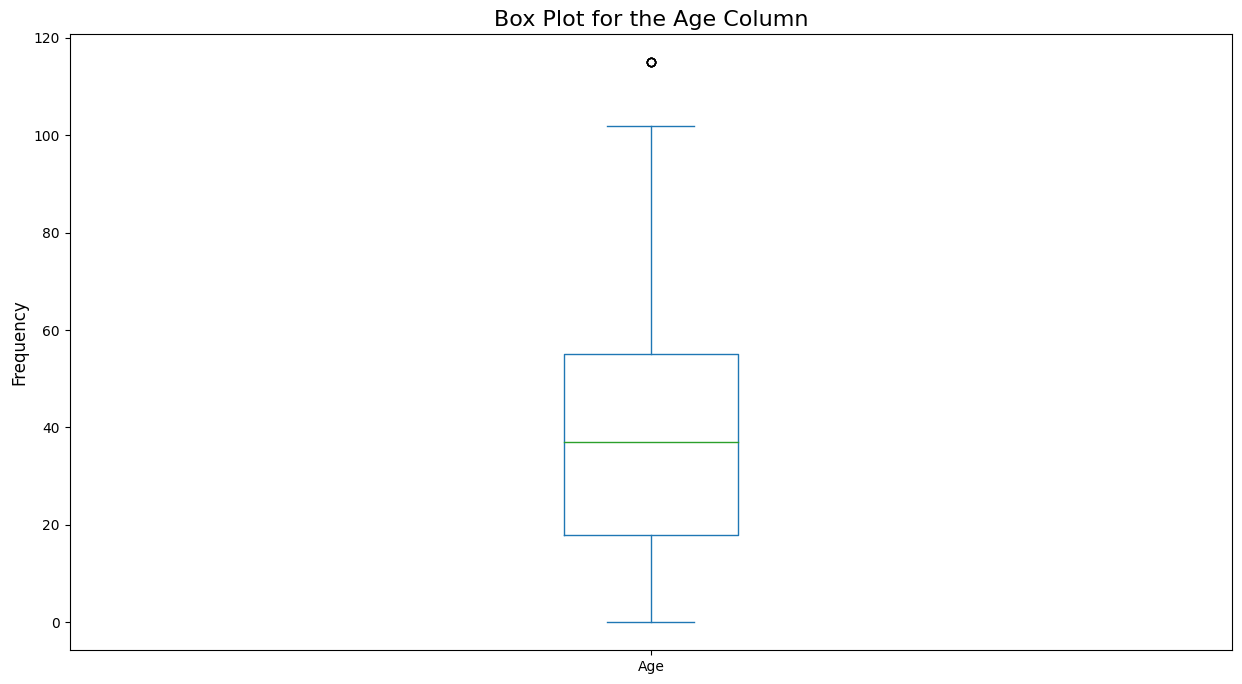

In [ ]:
# plot simple box plot for the age column

df['Age'].plot(kind='box', figsize=(15,8))

# add a title to the plot
plt.title("Box Plot for the Age Column", fontsize=16)

# adding and y label to the plot
plt.ylabel("Frequency", fontsize=12)


Text(0, 0.5, 'Age')

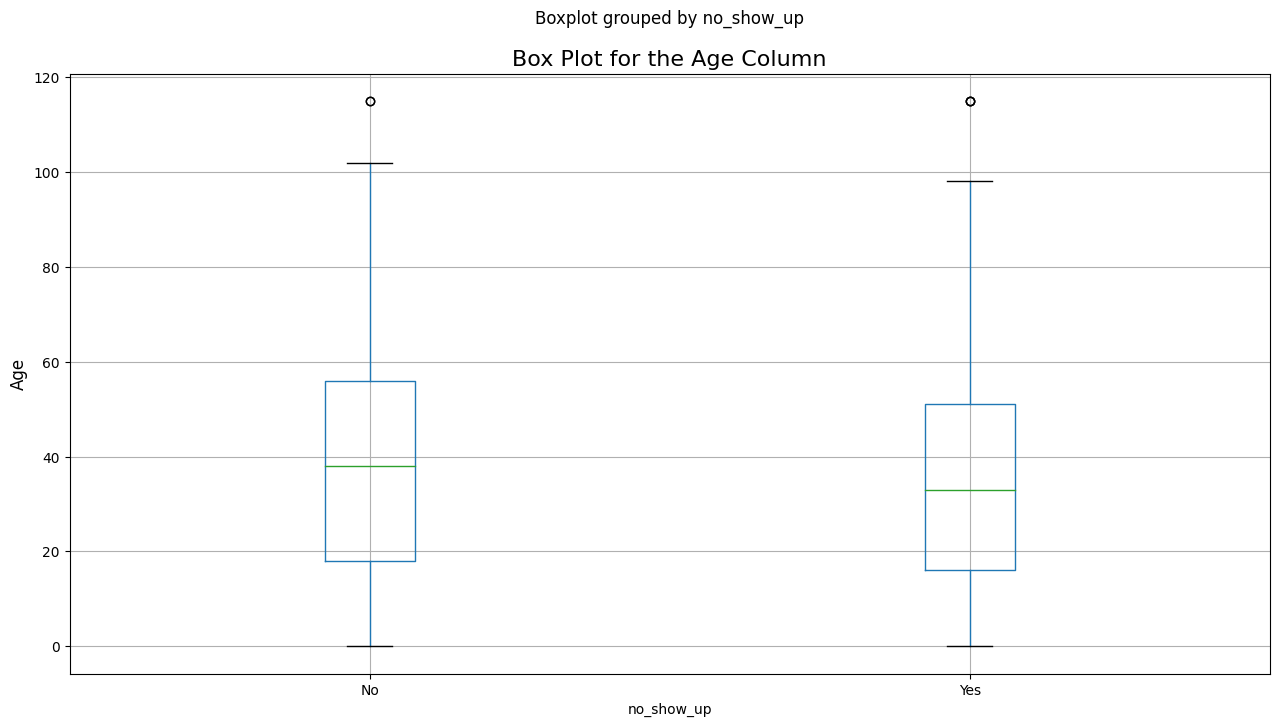

In [ ]:
# plot simple box plot allows you to depict the distribution of a continuous feature for different categories of a categorical feature.
df.boxplot(column='Age', by='no_show_up', figsize=(15,8));

# add a title to the plot
plt.title("Box Plot for the Age Column", fontsize=16)

# adding y label to the plot
plt.ylabel("Age", fontsize=12)


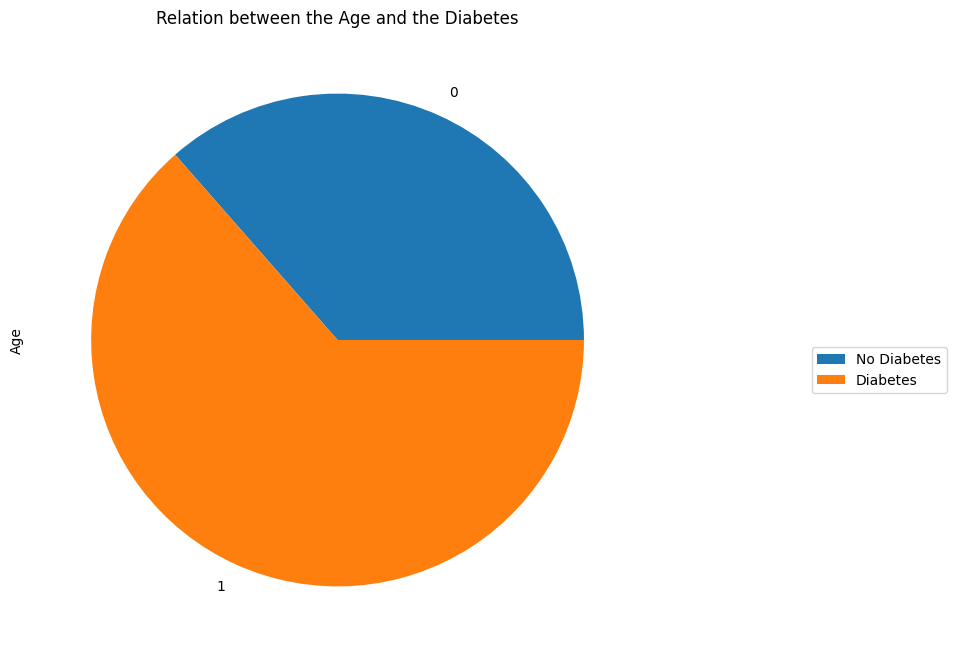

In [ ]:
# plot the relation between the Age and the diabetes and add a title to the plot and labels to the x and y axis
df.groupby('Diabetes')['Age'].mean().plot(kind='pie', figsize=(15,8))
plt.title('Relation between the Age and the Diabetes')


# adding more details about the legend
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.5), labels=['No Diabetes', 'Diabetes'])

# we can see that the patients who have a diabetes are older than the patients who don't have a diabetes

### Research Question 2: Check the correlation of the dataset

In [ ]:
# check the correlation between the columns in the dataset
# drop columns with string values

# df.corr()

# This will throw an error since we have string values in the dataset

In [ ]:
# check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  no_show_up      110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


In [ ]:
# we will converts the columns with string values to numerical values

# Convert Gender column to 0 and 1
df["Gender"].replace({"F": 0, "M": 1}, inplace=True)

In [ ]:
# Convert show_up column to 0 and 1
df["no_show_up"].replace({"No": 0, "Yes": 1}, inplace=True)


In [ ]:
# drop Neighbourhood column
df.drop(['Neighbourhood'], axis=1, inplace=True)

In [ ]:
df.corr()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show_up
Gender,1.000000,0.018138,-0.007078,-0.106452,-0.114296,-0.055722,-0.032556,0.106166,0.022813,-0.046302,-0.004122
ScheduledDay,0.018138,1.000000,0.605046,-0.019936,0.023345,0.012689,0.022465,0.032530,0.013608,-0.257240,-0.162339
AppointmentDay,-0.007078,0.605046,1.000000,0.012123,-0.001168,-0.001263,0.001389,0.002869,-0.003503,0.093877,-0.022402
Age,-0.106452,-0.019936,0.012123,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.114296,0.023345,-0.001168,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hipertension,-0.055722,0.012689,-0.001263,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,-0.032556,0.022465,0.001389,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.106166,0.032530,0.002869,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handcap,0.022813,0.013608,-0.003503,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,-0.046302,-0.257240,0.093877,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428


In [ ]:
# we can see that the show_up column has a negative correlation with the sms_received column
# which means that the patients who haven't received an sms are more likely to show up to their appointments


<a id='conclusions'></a>
## Conclusions

In [ ]:
# Summary:
# 1- We have 14 columns (features) in total and 110526 rows (patients) in total
# 2- We don't have any null values in the dataset
# 3- We have 48228 duplicate patientid values which means that we have 48228 patients who have booked more than one appointment
# 4- We have 7 patients who are older than 100 years old which is normal
# 5- We have 10861 patients who have a scholarship and 99666 patients who don't have a scholarship
# 6- We have 21801 patients who have a hypertension and 88726 patients who don't have a hypertension
# 7- We have 7943 patients who have a diabetes and 102584 patients who don't have a diabetes
# 8- We have 3360 patients who have a alcoholism and 107167 patients who don't have a alcoholism
# 9- We have 2241 patients who have a handicap and 108285 patients who don't have a handicap
# 10- We have 35482 patients who have received an sms and 75040 patients who haven't received an sms
# 11- We can see that most of the patients who have received an sms show up to their appointments
# 12- Also most of the patients who haven't received an sms show up to their appointments
# 13- So we can say that the sms_received is not a big factor that affects the no-show
# 14- But we can say that the patients who haven't received an sms are more likely to show up to their appointments
# 15- We can see that the show_up column has a negative correlation with the sms_received column
# 16- Which means that the patients who haven't received an sms are more likely to show up to their appointments
# 17- We have ignored the appointment day and the scheduled day columns since they are not needed for our analysis
# 18- We have ignored the patientid column since it is not needed for our analysis
# 19- We have ignored the appointmentid column since it is not needed for our analysis
# 20- We have ignored the neighbourhood column since it is not needed for our analysis


In [ ]:
# limitations of the study:

# We have ignored the appointment day and the scheduled day columns
# We have ignored the neighbourhood column

In [ ]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])